In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import median, mean
import warnings
warnings.filterwarnings('ignore')

## **DataFrame**

In [2]:
deportes_url = "https://raw.githubusercontent.com/lihkirun/AppliedStatisticMS/main/DataVisualizationRPython/Lectures/Python/PythonDataSets/athlete_events.csv"

In [3]:
deportes_df = pd.read_csv(deportes_url)
deportes_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


## Pasos previos

Para la realización de los 2 incisos, filtramos el DataFrame **deportes_df** con el fin de trabajar únicamente con los registros relacionados con los jugadores que participaron durante el año 2016 y se ganaron una medalla en alguno de los cinco deportes mencionados en la descripción.

In [4]:
deportes_2016 = deportes_df[(deportes_df['Year'] == 2016) & (deportes_df['Medal'].notna()) &(deportes_df["Sport"].isin(["Athletics", "Swimming", "Rowing", "Football", "Hockey"]))]
deportes_2016.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
158,62,Giovanni Abagnale,M,21.0,198.0,90.0,Italy,ITA,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Men's Coxless Pairs,Bronze
814,465,"Matthew ""Matt"" Abood",M,30.0,197.0,92.0,Australia,AUS,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Men's 4 x 100 metres Freestyle Relay,Bronze
1228,690,Chantal Achterberg,F,31.0,172.0,72.0,Netherlands,NED,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Women's Quadruple Sculls,Silver
1529,846,Valerie Kasanita Adams-Vili (-Price),F,31.0,193.0,120.0,New Zealand,NZL,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Women's Shot Put,Silver
1847,1017,Nathan Ghar-Jun Adrian,M,27.0,198.0,100.0,United States,USA,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Men's 50 metres Freestyle,Bronze


Para analizar el conjunto de datos, se hizo uso de la función `describe()`. Esta permite obtener las principales características de las variables del conjunto de datos, y a su vez, permite identificar de qué tipo son. 
Al hacer uso del código `deportes.describe()`, se puede identificar las variables de tipo númerico en la base de datos, y con el código `deportes.describe(include=object)` sabemos cuáles son las categóricas.
En este caso, se logró identificar que la base de datos cuenta con ambos tipos de variables.
Las variables **numéricas** son: ID, Age, Height, Weight y Year.
Las variables **categóricas** son: Name, Sex, Team, NOC, Games, Season, City, Sport, Event y Medal.

In [5]:
deportes_2016.describe()

,ID,Age,Height,Weight,Year
count,732.000000,732.000000,729.000000,727.000000,732.0
mean,68648.244536,25.577869,180.023320,73.720770,2016.0
std,39361.251654,4.451373,10.076398,14.279014,0.0
min,62.000000,16.000000,150.000000,40.000000,2016.0
25%,32676.750000,22.000000,173.000000,64.000000,2016.0
50%,73187.000000,25.000000,180.000000,72.000000,2016.0
75%,103225.000000,29.000000,187.000000,82.000000,2016.0
max,135525.000000,40.000000,207.000000,136.000000,2016.0


In [6]:
deportes_2016.describe(include=object)

,Name,Sex,Team,NOC,Games,Season,City,Sport,Event,Medal
count,732,732,732,732,732,732,732,732,732,732
unique,648,2,54,54,1,1,1,5,99,3
top,"Michael Fred Phelps, II",M,United States,USA,2016 Summer,Summer,Rio de Janeiro,Athletics,Football Women's Football,Gold
freq,6,377,127,127,732,732,732,192,54,254


## Inciso 1
# Crea un gráfico utilizando una técnica de visualización adecuada que presente de la mejor manera posible el patrón global de las características de height y weight de los ganadores de medallas de 2016 de los cinco deportes.

[Text(0.5, 0, 'Altura'),
 Text(0, 0.5, 'Peso'),
 Text(0.5, 1.0, 'Correlación entre el peso y la altura de los participantes.')]

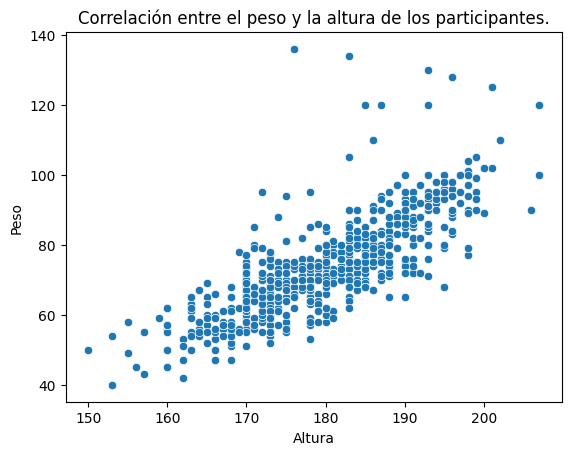

In [7]:
ax = sns.scatterplot(x="Height", y="Weight", data=deportes_2016)
ax.set(xlabel = 'Altura', ylabel = 'Peso', title = 'Correlación entre el peso y la altura de los participantes.')

El gráfico escogido fue el de dispersión. A partir de este, notamos que es posible afirmar que existe una correlación positiva entre ambas variables dado que la tendencia del comportamiento de los puntos es directamente proporcional. Es decir, con lo que se muestra en la imagen, podemos concluir que, a manera general, entre mayor sea la altura del jugador, mayor será su peso. Por otro lado, resulta pertinente mencionar que se presenta el caso de algunos puntos los cuales se pueden considerar atípicos debido a su alejamiento de los demás que se encuentran bastante cerca y concentrados.

## Inciso 2
# Crea un gráfico utilizando una técnica de visualización adecuada que presente de la mejor manera posible la estadística de resumen para la altura y el peso de los jugadores que ganaron cada tipo de medalla (oro/plata/bronce) en los datos.

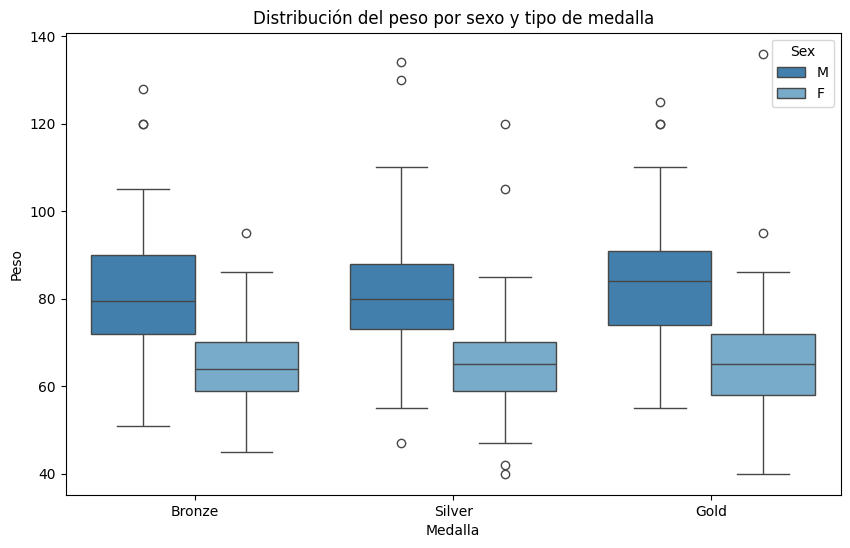

In [8]:
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x="Medal", y="Weight", hue="Sex", data=deportes_2016, palette="tab20c")
ax.set(xlabel="Medalla", ylabel="Peso", title="Distribución del peso por sexo y tipo de medalla")
plt.show()

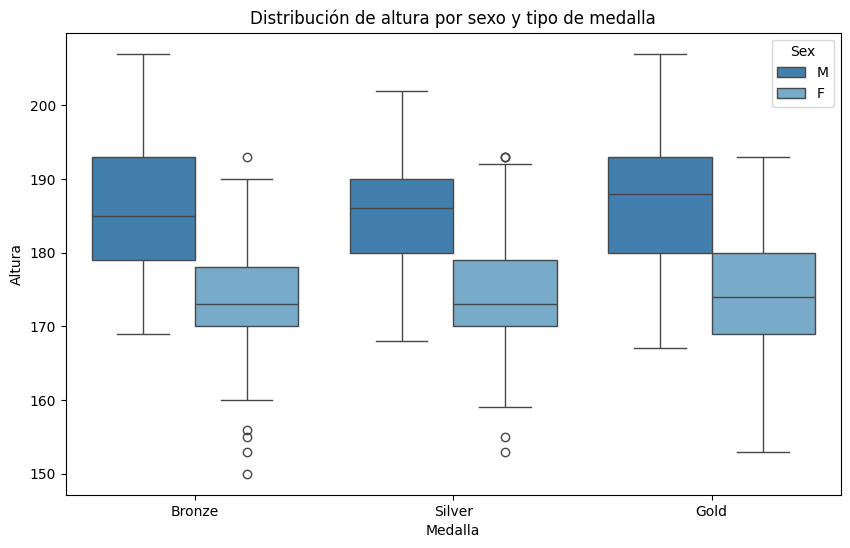

In [9]:
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x="Medal", y="Height", hue="Sex", data=deportes_2016, palette="tab20c")
ax.set(xlabel="Medalla", ylabel="Altura", title="Distribución de altura por sexo y tipo de medalla")
plt.show()